# Exploring CIA World Factbook

In [5]:
import sqlite3
import pandas as pd
conn = sqlite3.connect("factbook.db")

q = "SELECT * FROM sqlite_master WHERE type='table';"
pd.read_sql_query(q,conn)

,type,name,tbl_name,rootpage,sql
0,table,facts,facts,2,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."
1,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"


In [8]:
q = "SELECT * FROM facts LIMIT 5;"
pd.read_sql_query(q,conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51,2015-11-01 13:19:49.461734,2015-11-01 13:19:49.461734
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30,2015-11-01 13:19:54.431082,2015-11-01 13:19:54.431082
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92,2015-11-01 13:19:59.961286,2015-11-01 13:19:59.961286
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00,2015-11-01 13:20:03.659945,2015-11-01 13:20:03.659945
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46,2015-11-01 13:20:08.625072,2015-11-01 13:20:08.625072


In [10]:
q = "SELECT MIN(population),MAX(population),MIN(population_growth),MAX(population_growth) FROM facts;"
pd.read_sql_query(q,conn)

,MIN(population),MAX(population),MIN(population_growth),MAX(population_growth)
0,0,7256490011,0.0,4.02


In [11]:
q = "SELECT Name,population FROM facts WHERE population = 0;"
pd.read_sql_query(q,conn)

,name,population
0,Antarctica,0


In [14]:
q = "SELECT Name,population FROM facts WHERE population = (\
     SELECT MAX(population) FROM facts);"
pd.read_sql_query(q,conn)

,name,population
0,World,7256490011


## About the Lowest and Largest Populations
The lowest population is Antarctica, where there is no one actually living there. There is some tourism and some scientists stay there for as long as 2 years, but they are not considered to be living there.
The largest population is World - not a country, but the World itself. There is nothing interesting to talk about this.

In [48]:
q = "SELECT population,population_growth,birth_rate,death_rate FROM facts WHERE population != 0 AND population != (\
     SELECT MAX(population) FROM facts);"
data_no_outliers = pd.read_sql_query(q,conn);
data_no_outliers.head()

,population,population_growth,birth_rate,death_rate
0,32564342,2.32,38.57,13.89
1,3029278,0.30,12.92,6.58
2,39542166,1.84,23.67,4.31
3,85580,0.12,8.13,6.96
4,19625353,2.78,38.78,11.49


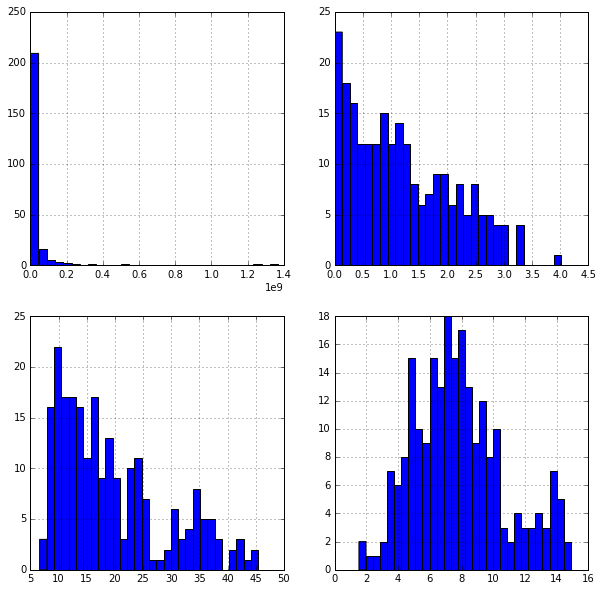

In [49]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,10))
fig.add_subplot(221)
data_no_outliers.population.hist(bins=30);
fig.add_subplot(222)
data_no_outliers.population_growth.hist(bins=30);
fig.add_subplot(223)
data_no_outliers.birth_rate.hist(bins=30);
fig.add_subplot(224)
data_no_outliers.death_rate.hist(bins=30);